In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn')

In [12]:
X = np.load('./extracted_features/X.npy')
X = np.mean(X, axis=2)

y = np.load('./extracted_features/y.npy')
y = y.reshape(-1, 1)

X.shape, y.shape

((1584, 15), (1584, 1))

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1267, 15), (317, 15), (1267, 1), (317, 1))

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(15, 1)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4352      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 5,507
Trainable params: 5,507
Non-trainable params: 0
_________________________________________________________________


In [17]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, verbose=1, patience=10)

history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


2022-11-26 19:26:44.814162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-26 19:26:44.923816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 1/20 [>.............................] - ETA: 20s - loss: 1.0998 - accuracy: 0.3594

2022-11-26 19:26:45.072684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 2s 33ms/step - loss: 1.0819 - accuracy: 0.4420 - val_loss: 1.0607 - val_accuracy: 0.4795
Epoch 2/20
 1/20 [>.............................] - ETA: 0s - loss: 1.0449 - accuracy: 0.5781

2022-11-26 19:26:45.730276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-26 19:26:45.777339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 13ms/step - loss: 1.0313 - accuracy: 0.5114 - val_loss: 0.9836 - val_accuracy: 0.5489
Epoch 3/20
20/20 [==============================] - 0s 12ms/step - loss: 0.9218 - accuracy: 0.5864 - val_loss: 0.8351 - val_accuracy: 0.6183
Epoch 4/20
20/20 [==============================] - 0s 12ms/step - loss: 0.7225 - accuracy: 0.6433 - val_loss: 0.6715 - val_accuracy: 0.6530
Epoch 5/20
20/20 [==============================] - 0s 13ms/step - loss: 0.6067 - accuracy: 0.6606 - val_loss: 0.6089 - val_accuracy: 0.6625
Epoch 6/20
20/20 [==============================] - 0s 13ms/step - loss: 0.5592 - accuracy: 0.6851 - val_loss: 0.5704 - val_accuracy: 0.7035
Epoch 7/20
20/20 [==============================] - 0s 13ms/step - loss: 0.5126 - accuracy: 0.7577 - val_loss: 0.4996 - val_accuracy: 0.8170
Epoch 8/20
20/20 [==============================] - 0s 13ms/step - loss: 0.4239 - accuracy: 0.8343 - val_loss: 0.4525 - val_accuracy: 0.8233
Epoch 9/20
20/20 [======

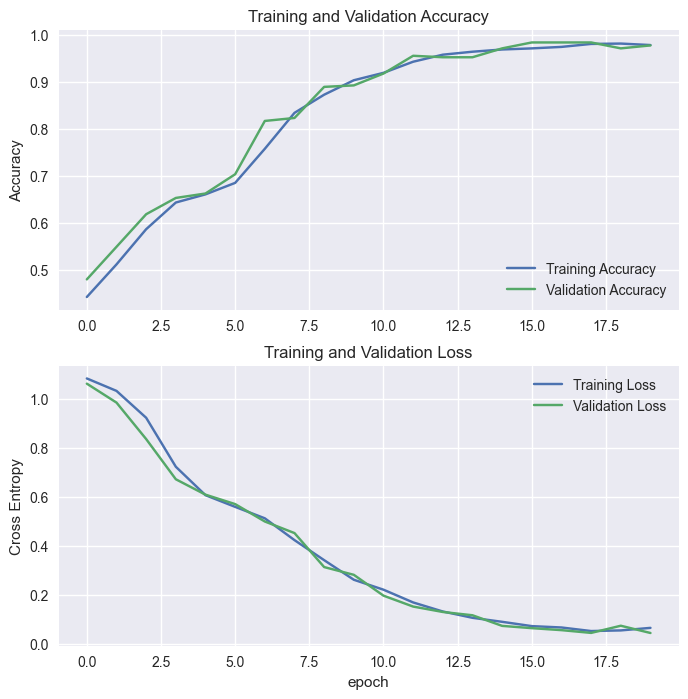

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [19]:
model.save('best.h5')

In [23]:
loss, acc = model.evaluate(x_train, y_train, verbose=0)
print(f"Training loss: {loss:.4f}")
print(f"Training Accuracy: {(acc * 100):.2f}%\n")

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Testing loss: {loss:.4f}")
print(f"Testing Accuracy: {(acc * 100):.2f}%")

Training loss: 0.0456
Training Accuracy: 98.26%

Testing loss: 0.0458
Testing Accuracy: 97.79%
